# Scientific Computing with Python

Chris Myers

Senior Research Associate &mdash; Cornell University Center for Advanced Computing (CAC)

Adjunct Professor &mdash; Cornell Department of Physics / Laboratory of Atomic & Solid State Physics (LASSP)

https://cac.cornell.edu/myers

c.myers@cornell.edu

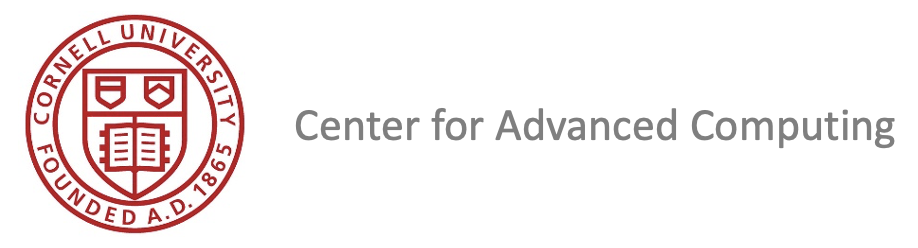

<!--[](CAC_header.png)-->
<!-- <img align="left" src="CAC_header.png" alt="CAC logo" width="500"/> -->

# Outline

* Overview of the Python ecosystem for scientific computing and data science
* A few core packages
    * NumPy
    * SciPy
    * Pandas
    * Matplotlib
* Integration of the larger ecosystem
* Some hands-on exercises in this Jupyter notebook

# Additional Resources

* Previous CAC/SCTS lectures on "Introduction to Python" and "JupyterLab (in the Cloud) with Python"
* Python language website: python.org
    * https://docs.python.org/3/tutorial/index.html
* Package websites
    * numpy.org and associated documentation
    * scipy.org and associated documentation
    * pandas.pydata.org and associated documentation
    * matplotlib
* Cornell Virtual Workshop (CVW) materials at https://cvw.cac.cornell.edu
    * Introduction to Python
    * Python for Data Science
    * Python for High Performance
    * AI with Deep Learning

# Working in this notebook

We have scheduled this as a 90-minute session with a hands-on component.
 
If you want to run the exercises in this notebook:
* See full instructions at https://github.com/CornellCAC/SCTS_SciCompPy -- including information on downloading this notebook
* Either run on your local machine, or in a Jupyter cloud environment (e.g., Google Colab, Amazon SageMaker Studio Lab, SageMaker Studio)
* You will need the following packages in your environment to run all code in the notebook
    * numpy
    * scipy
    * pandas
    * matplotlib
    * jupyter
    * statsmodels ( on SageMaker Studio Lab, with the sagemaker-distribution kernel, need to do %conda install statsmodels )
    * openpyxl ( on SageMaker Studio Lab, with the sagemaker-distribution kernel, need to do %conda install openpyxl )
* I will proceed through this notebook throughout the lecture.  I will execute code cells as we proceed, but you can too if you want.
* I have saved almost all of the exercises for the end of the webinar, in case people need to leave or are not planning on doing the exercises.
* Solutions to all the exercises are at the end of the notebook.
* We have a quick poll question.

If we suffer through yet another fire alarm and I need to exit the building, I suggest you find the exercises at the end of the notebook and start looking at them and/or working on them.  I will try to reconnect ASAP.

**Exercise:  What number results from adding 2 and 4, and then raising the sum to the 6th 
power?**

**Exercise: Do you have all the packages installed that you need?**

If no errors are reported when running the code cell below, you should have everything you need.

In [1]:
try:
    import numpy as np
except ModuleNotFoundError:
    print("numpy not found")
try:
    import scipy
except ModuleNotFoundError:
    print("scipy not found")
try:
    import pandas as pd
except ModuleNotFoundError:
    print("pandas not found")
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    print("matplotlib not found")
try:
    import statsmodels
except ModuleNotFoundError:
    print("statsmodels not found")
try:
    import openpyxl
except ModuleNotFoundError:
    print("openpxyl not found")

In [91]:
# If you need to install additional packages, you could try to do so here.

# e.g., after uncommenting the line below,

# %conda install statsmodels openpyxl

# Python as a programming language

* Python is a general-purpose programming language (not intended specifically for scientific computing)
* Python is an interpreted programming language (not compiled like C/C++, Fortran, Java, etc.)
* Python is an extensible programming language
    * The default Python interpreter &mdash; installed as python, known formally as CPython &mdash; is accompanied by an Application Programming Interface (API) that enables communication between Python and C (and thus to basically any other language)
    * Python/C API allows for compiled chunks of code to be called from Python or executed within the CPython interpreter → <i>extension modules</i>
* Most functionality for scientific computing and data science is provided by third-party libraries, and often implemented using compiled extension modules to off-load the numerically intensive parts to compiled code
* The scientific computing community was an early adopter of Python, and helped to push the development of tools and packages for scientific and numerically intensive computing

# The Python ecosystem for scientific computing and data science

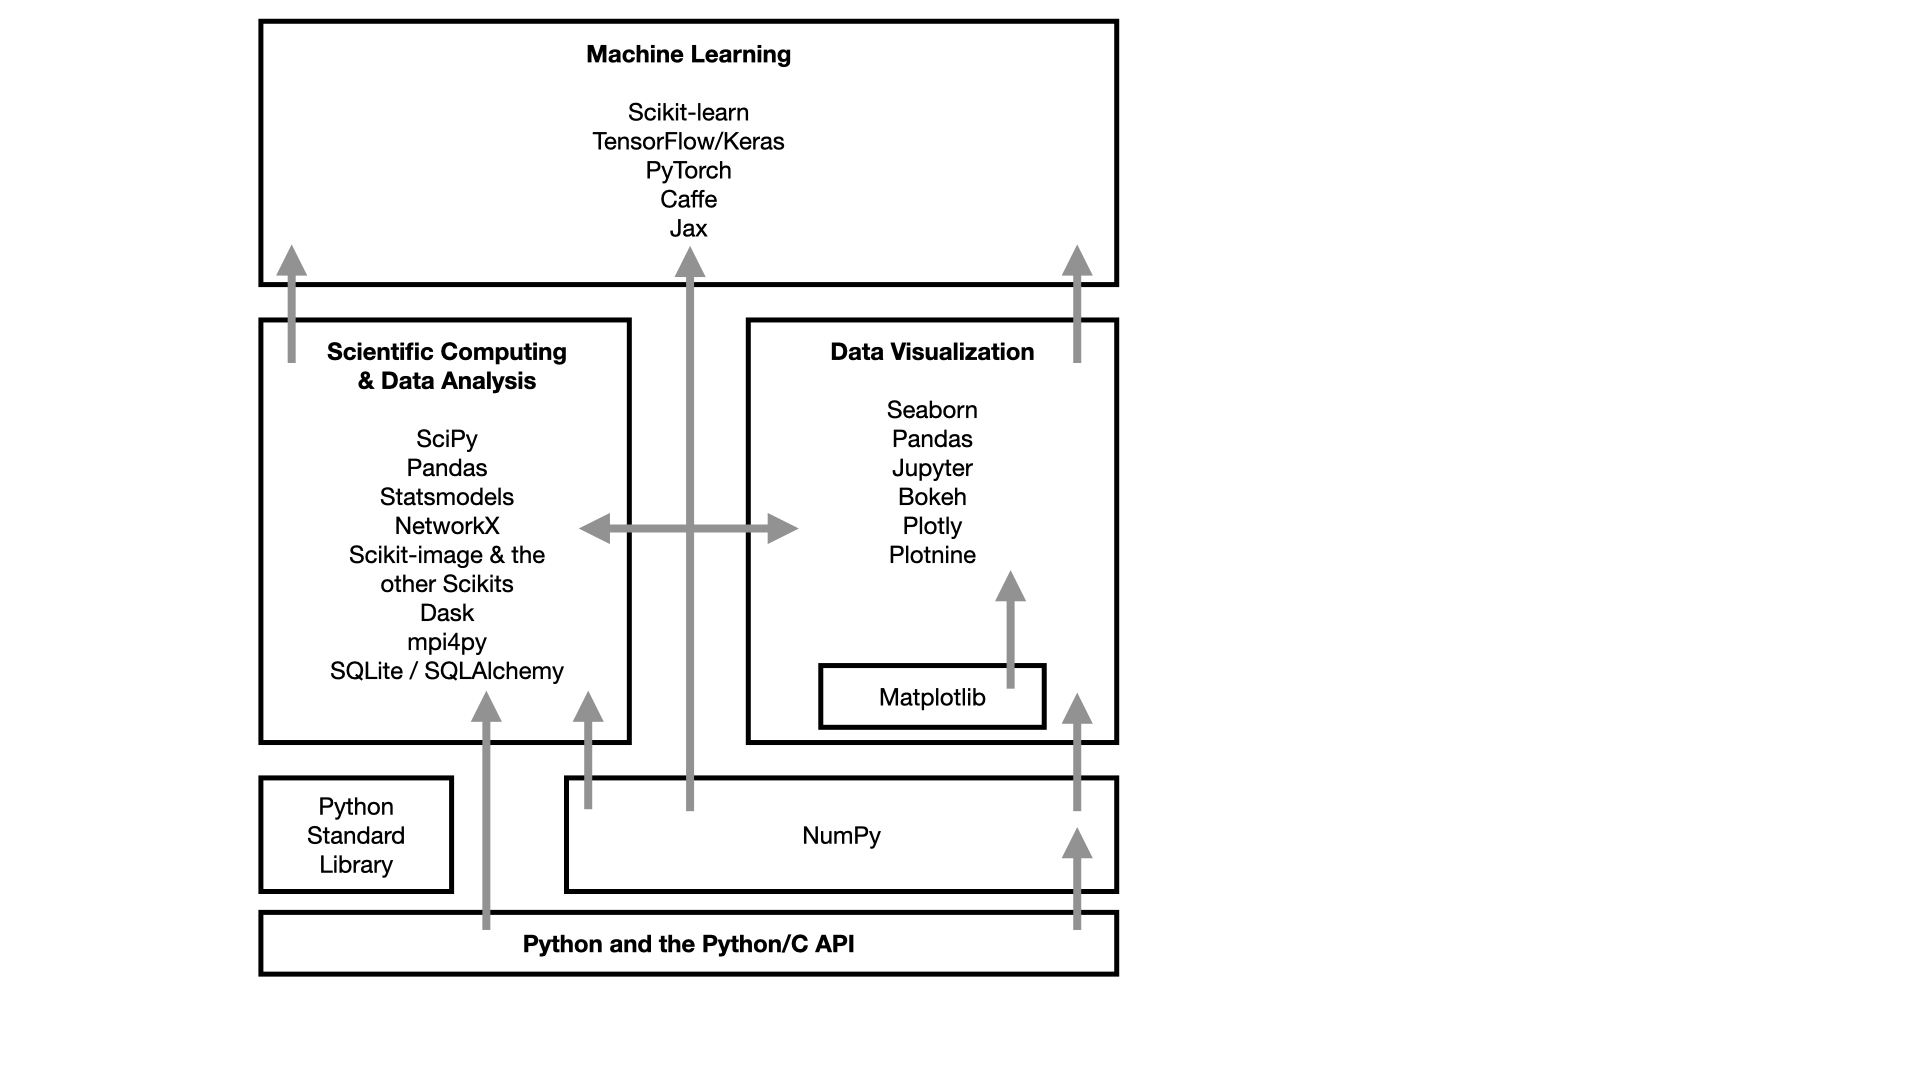
<!-- <img align="left" src="PySciEcosystem.001.png" alt="Python ecosystem" height="650"/> -->

# Installing Python and associated packages

* Your machine might already have a version of Python installed
    * it might be part of the OS in /bin or /usr/bin and used for system administration &mdash; best to leave that one alone (don't update unless part of system updates, don't add extra packages to it)
    * it might have been installed by sys-admins in a centralized location for multiple users, but might not have every package you need (you can still install additional packages &mdash; see below)
* Multiple installations of Python can co-exist on a single machine
    * any given installation knows where to look for packages
    * from within python interpreter: `import sys; print(sys.path)`
* Several different organizations produce bundled Python distributions ("batteries included")
    * Anaconda, Enthought, ActiveState, Intel, etc.
    * Anaconda Python Distribution is probably the most popular, and installs a large number of packages by default
    * Alternatively, Anaconda also provides miniconda and the conda package manager (more below)

## Environments, virtual environments, and package managers

* One *big* Python installation might be convenient, but can also suffer from incompatibilities among packages (e.g., different version requirements) and can be difficult to maintain, especially if supporting multiple users
* Generally better to create smaller, focused environments (walled-off installations) for different problems and use cases
* For <i>any</i> Python installation, you can use the Python `venv` module to create a new virtual environment, and use the `pip` package manager to install packages (downloaded from PyPI, the Python Package Index, at pypi.org)
* For a <i>conda-based</i> installation (either the full Anaconda Python Distribution, or a miniconda-based system), you can use the `conda` package manager to create and manage conda environments

## Conda package manager

* <b>Conda</b> is a package manager that can install Python packages along with programs and tools written in other languages (and perhaps compiled from source code as part of an installation)
* <b>Miniconda</b> is a minimal setup that mostly just installs conda and some supporting tools &mdash; it's up to you to build environments to suit your needs
* Different packages might be available from different <i>channels</i> (e.g., default, conda-forge, bioconda)
* Can specify version numbers or requirements
* Can install packages as part of environment creation, after the fact, or from an yaml file (environment.yml)
* To create and activate a conda environment with everything needed to run this notebook:
 
<tt>conda create --name py_sci_comp python numpy scipy pandas matplotlib statsmodels openpyxl jupyter</tt><br/>
<tt>conda activate py_sci_comp</tt>

Some other useful commands:

* `conda env list`: list all your conda environments
* `conda list`: list all the packages installed in your currently activated environment
* `conda env remove --name ENVNAME`: remove environment ENVNAME and everything in it
* `conda update PACKAGENAME`: update package PACKAGENAME in the current environment



## Python Virtual Environments and pip

* Python virtual environments use an existing python installation and create a new environment using the `venv` module (part of the Python Standard Library)
* Can do this to customize a centralized Python installation with additional packages for your work
* Once created and activated, packages are installed into a Python virtual environment using the `pip` package manager
* pip can also be used within a conda environment for packages that conda does not know about
* To create and activate a python virtual environment with everything needed to run this notebook:

<tt>python -m venv py_sci_comp  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; # might be installed as python3 on your system</tt><br/>
<tt>source py_sci_comp/bin/activate</tt><br/>
<tt>pip install --upgrade pip</tt>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; # get the latest version of pip<br/>
<tt>pip install numpy scipy pandas matplotlib statsmodels openpyxl jupyter</tt>

# NumPy

* NumPy = "Numerical Python", the cornerstone of the Python Scientific Computing Ecosystem
* largely written in C, with links to BLAS and LAPACK libraries for linear algebra
* provides multidimensional arrays, plus linear algebra and random numbers

## NumPy arrays

* core data structure: multidimensional arrays (ndarray = "N-dimensional array")
* array syntax enables compact expressions and efficient computations
* a substrate for array-based computations throughout the Python ecosystem
* similar in spirit to the role that arrays/matrices play in MATLAB
    * see https://numpy.org/doc/stable/user/numpy-for-matlab-users.html
    
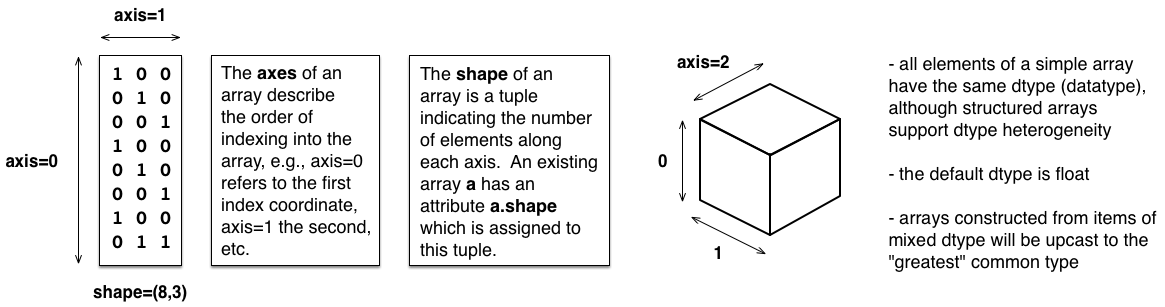

<!-- <img align="left" src="AnatomyArray.png" alt="Anatomy of an array" width="1500"/> -->

## Array creation

In [2]:
import numpy as np     # this is the conventional shorthand when importing numpy

np.set_printoptions(linewidth=500)

x = np.array([[1,2,3], [4,5,6], [7,8,9]])

x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [3]:
x.shape

(3, 3)

In [4]:
y = np.random.random((3,3))

y

array([[0.03053715, 0.78780758, 0.1934083 ],
       [0.57329554, 0.80239274, 0.07466822],
       [0.98748356, 0.40095171, 0.43649704]])

In [5]:
z = np.linspace(0.,1.,11)

z

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## Array indexing and slicing

Extends Python list indexing and slicing to multiple dimensions
* indexing to access individual elements &mdash; counting starts at 0, negative indices count back from end
* slicing to access range of elements &mdash; starting at start, ending before stop

In [6]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]])

a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [7]:
a[1,2]   # return element at row 1, column 2

7

In [8]:
a[1]     # return entire row 1

array([5, 6, 7, 8])

In [9]:
a[0:2, 0:2]   # return sub-block starting at (0,0), ending before (2,2)

array([[1, 2],
       [5, 6]])

In [10]:
a[1:, 2:]     # slice without stop extends to the end of the array

array([[ 7,  8],
       [11, 12],
       [15, 16]])

In [11]:
a[:2, :]      # slice without start begins from the start of the array

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [12]:
a[:, 2]      # return entire column 2  -- but not as a column vector

array([ 3,  7, 11, 15])

In [13]:
a[:, -2:]   # return last 2 columns, using negative indexing

array([[ 3,  4],
       [ 7,  8],
       [11, 12],
       [15, 16]])

**Exercise: create a random 6x6 array, and then set all of the external boundary elements to 0**

```
array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.71805732, 0.39160651, 0.96878196, 0.78647996, 0.        ],
       [0.        , 0.30139885, 0.90427498, 0.88536916, 0.35571022, 0.        ],
       [0.        , 0.25338582, 0.82808954, 0.68977872, 0.35322438, 0.        ],
       [0.        , 0.40537692, 0.05262188, 0.67718642, 0.93915693, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])
```
       

In [14]:
z = np.arange(24).reshape((3,4,2))

print(z)

z[:,:,-1]

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]]


array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

## Array operations

* Element-wise unary operations (also known as universal functions or ufuncs)
    * np.exp(a), np.log10(a), np.sin(a), np.cos(a), etc.
    * produce new array of the same shape, with each element transformed by the applied operation
* Element-wise binary operations
    * addition + ; subtraction - ; multiplication * ; division / ; exponentiation ** ; etc.
    * logical operations: == ; > ; < ; != ; etc.
* Matrix multiplication / dot products
    * uses @ operator, e.g., M @ v
* Aggregating unary operations (optionally along a specified axis)
    * sum, mean, max, min, etc.
* Array manipulations
    * transpose, concatenation, reshape, filtering, etc.

In [15]:
w = 3*x - 4*y   # throws ValueError if x and y are not the same shape

w

array([[ 2.87785139,  2.84876969,  8.22636679],
       [ 9.70681782, 11.79042904, 17.70132712],
       [17.05006574, 22.39619314, 25.25401184]])

In [16]:
w > 10

array([[False, False, False],
       [False,  True,  True],
       [ True,  True,  True]])

In [17]:
np.where(w > 10, w, 0)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        , 11.79042904, 17.70132712],
       [17.05006574, 22.39619314, 25.25401184]])

In [18]:
a = np.random.random((1000,1000))
b = np.random.random((1000,1000))

c = a + b    # element-wise addition

In [19]:
%%timeit       # uses IPython/Jupyter magic function to time how long it takes to run this cell

c = a + b

752 µs ± 56.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
%%timeit

assert(a.shape == b.shape)  # throws AssertionError if a and b not the same shape 
c = np.zeros_like(a)        # prefills a zero array of the correct shape

for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        c[i,j] = a[i,j] + b[i,j]

239 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
# Speedup?

## Performance using array operations


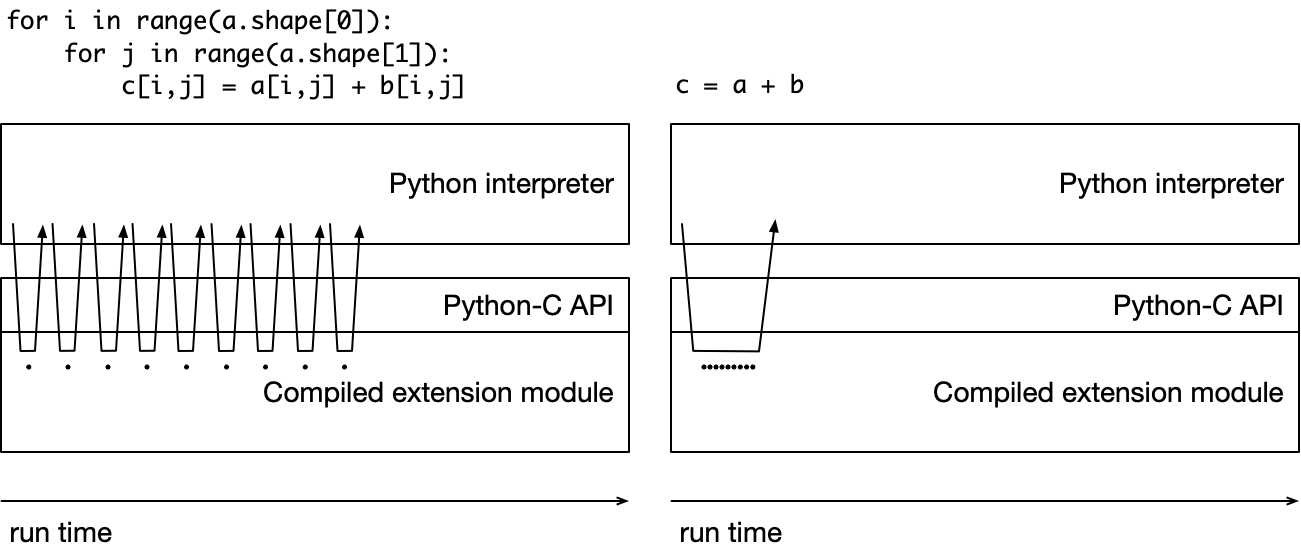

<!-- <img src="PyArrayLoops.png" width="1200"/></div> -->

* Array operations represent a form of vectorization &mdash; can be ported to other backends supporting vectorization (e.g., GPUs)
* Conventional wisdom: avoid loops in Python and use array syntax for better performance
* Challenge: figuring out how to express complex operations solely using array syntax (including indexing, slicing, and broadcasting), without resorting to for loops
* Caveat: convenient array syntax can disguise some performance inefficiencies (e.g., temporary arrays)
* Alternative approaches (e.g., Cython, Numba) use compiler technology and can generate more efficient code if loops are explicitly written out &mdash; see CVW on "Python for High Performance" for more details
    

## Aggregating unary operations

In [22]:
print(x)

x.sum()          # sum over all elements of array

[[1 2 3]
 [4 5 6]
 [7 8 9]]


45

In [23]:
x.sum(axis=0)    # sum over rows for each column

array([12, 15, 18])

In [24]:
x.sum(axis=1)   # sum over columns for each row

array([ 6, 15, 24])

In [25]:
x.mean(axis=1)  # mean for each row

array([2., 5., 8.])

In [26]:
x.std(axis=0)  # standard deviation for each column

array([2.44948974, 2.44948974, 2.44948974])

## NumPy Recap

* Only showed you a few NumPy features &mdash; there are many more
    * Linear algebra (matrix operations, eigenvalues/vectors, solving linear systems, etc.)
    * Lots of exotic array broadcasting operations, enabling operations among arrays of different but compatible shapes
    * Lots of functions to filter or process data in arrays based on various criteria
    * Masked arrays, structured arrays
* See NumPy documentation for more details: https://numpy.org/doc/stable/index.html
* We will revisit NumPy arrays in the exercises at the end

# SciPy

* SciPy = "Scientific Python"
* sits on top of NumPy, wrapping many C and Fortran numerical routines, with convenient Python interfaces
* routines for integration, optimization, root-finding, interpolation, fitting, special functions, etc.
* engineered to support user-defined Python functions for customization of problem specifics

## SciPy Organization 

From https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide

| Subpackage | Description |
|:-----------|:------------|
|cluster     |Clustering algorithms|
|constants |Physical and mathematical constants|
|fftpack|Fast Fourier Transform routines|
|**integrate**|**Integration and ordinary differential equation solvers**|
|interpolate|Interpolation and smoothing splines|
|io|Input and Output|
|linalg|Linear algebra|
|ndimage|N-dimensional image processing|
|odr|Orthogonal distance regression|
|**optimize**|**Optimization and root-finding routines**|
|signal|Signal processing|
|sparse|Sparse matrices and associated routines|
|spatial|Spatial data structures and algorithms|
|special|Special functions|
|stats|Statistical distributions and functions|

## Example: Infectious Disease Dynamics

* SIRS infection model
    * S: Susceptible hosts (can become infected)
    * I: Infected hosts (are infected and can infect others)
    * R: Recovered hosts (and cannot become infected)
* State transitions
    * infection: S + I -> I + I  at rate $\beta S I$
    * recovery: I -> R at rate $\gamma I$
    * waning immunity: R -> S at rate $\rho R$
* Dynamical model: Ordinary Differential Equation (ODE)
\begin{align}
\frac{dS}{dt} &= -\beta S I + \rho R \\
\frac{dI}{dt} &= \beta S I - \gamma I \\
\frac{dR}{dt} &= \gamma I - \rho R
\end{align}
* Initial value problem (IVP): integrate forward in time from specified initial condition


## Integrating differential equations

Most packages supporting integration of ordinary differential equations (ODEs) &mdash; whether in Python, R, MATLAB, Julia, C, Fortran, etc. &mdash; require writing an ODE conceptually in the form:
$$\frac{d\vec y}{dt} = f(t, \vec y, \vec p)$$
where<br><br>

* $t$ is an independent variable (e.g., time)
* $\vec y$ is a vector of state variables
* $\vec p$ is a vector of parameters
* $f$ is a function that returns the instantaneous rate-of-change of the state variables

For SIRS model:

$$\frac{d\vec y}{dt} = f(t, \vec y, \vec p)$$

* $\vec y = [S,I,R]$
* $\vec p = [\beta, \gamma, \rho] $
* $f(t,\vec y, \vec p) = [-\beta S I + \rho R, \beta S I - \gamma I, \gamma I - \rho R]$

In [27]:
from scipy.integrate import solve_ivp

beta = 1.0
gamma = 1/2.
rho = 1/14.

def SIRS(t, y, p):
    S, I, R = y
    beta, gamma, rho = p
    dS = -beta*S*I + rho*R
    dI =  beta*S*I - gamma*I
    dR =  gamma*I - rho*R
    return [dS, dI, dR]

def integrate_SIRS(p, y0=[1-1e-3, 1e-3, 0.]):
    times = np.linspace(0.,100.,101)
    output = solve_ivp(SIRS, (times[0], times[-1]), y0, args=(p,), t_eval=times)
    return output

output = integrate_SIRS((beta, gamma, rho))

print(output)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  9.900e+01  1.000e+02]
        y: [[ 9.990e-01  9.977e-01 ...  4.997e-01  4.998e-01]
            [ 1.000e-03  1.646e-03 ...  6.237e-02  6.236e-02]
            [ 0.000e+00  6.275e-04 ...  4.379e-01  4.378e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 116
     njev: 0
      nlu: 0


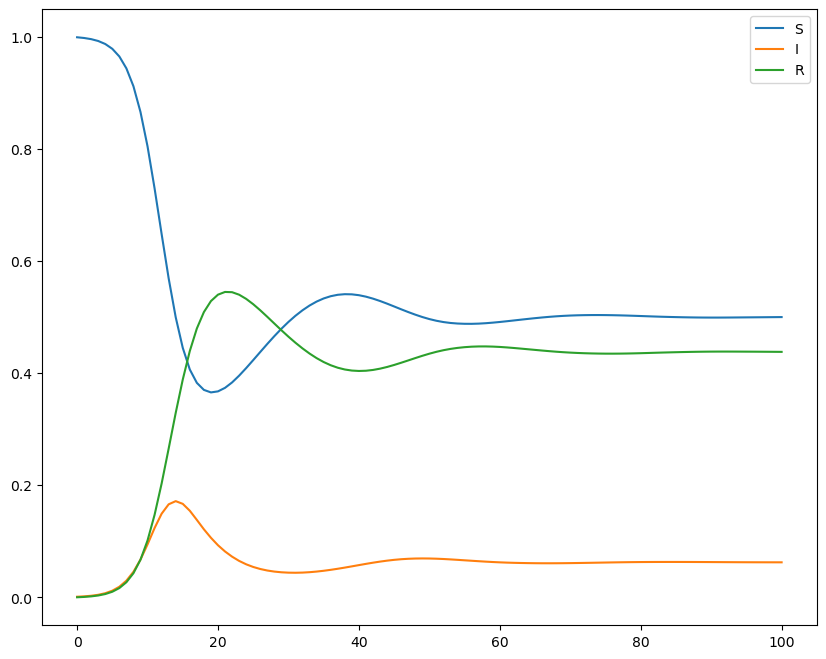

In [28]:
Ss, Is, Rs = output['y']
times = output['t']

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,8))

plt.plot(times, Ss, label='S')
plt.plot(times, Is, label='I')
plt.plot(times, Rs, label='R')
plt.legend();

## Parameter estimation: minimizing an objective function

* Maybe we don't know the values of the parameters in the model, but want to estimate them by fitting the model to data (e.g., daily fraction of infected hosts)<br>
* $$\frac{d\vec{y}}{dt} = f(t, \vec{y}, \vec{p}) \implies \rm{trajectory}\ \vec y(t; \vec p)$$<br>
* Minimize least-squares cost function describing deviation of model predictions from data<br>
* $$C(\vec p) = \sum_{j} \Big (y(t_j; \vec p) - y^*(t_j) \Big)^2$$


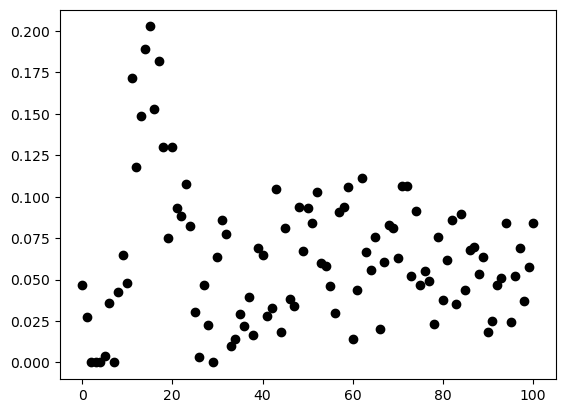

In [29]:
daily_infection_data = np.clip(Is + 0.1 * (np.random.random(len(Is))-0.5), a_min=0., a_max=1.0)
plt.plot(times, daily_infection_data, 'ko', label='data')

## Function minimization

The process of minimization is computationally abstracted to require a function $C(\vec p)$ of one or more variables $\vec p$ that we want to minimize:

$$\vec p_{opt} = \rm{argmin}_{\vec p}\ {C(\vec p)}$$

and for this problem:

$$C(\vec p) = \sum_{j} \Big (y(t_j; \vec p) - y^*(t_j) \Big)^2$$

In [30]:
from scipy.optimize import minimize     # minimize(fn, p0) finds value of p than minimizes fn(p), starting from guess p0

def cost(p):
    sol = integrate_SIRS(p)
    sse = np.sum((sol.y[1] - daily_infection_data)**2)
    return sse

p_initial = [2., 1., 1.]   # initial guess for parameters (beta, gamma, rho)

popt = minimize(cost, p_initial, method='Nelder-Mead')

print(popt)


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.069316496036965
             x: [ 9.376e-01  4.536e-01  5.946e-02]
           nit: 136
          nfev: 243
 final_simplex: (array([[ 9.376e-01,  4.536e-01,  5.946e-02],
                       [ 9.376e-01,  4.536e-01,  5.947e-02],
                       [ 9.375e-01,  4.536e-01,  5.947e-02],
                       [ 9.376e-01,  4.536e-01,  5.947e-02]]), array([ 6.932e-02,  6.932e-02,  6.932e-02,  6.932e-02]))


Generating parameters: (1.0, 0.5, 0.07142857142857142)
Inferred parameters: (0.9375863048036646, 0.453583437270511, 0.05946038569410183)


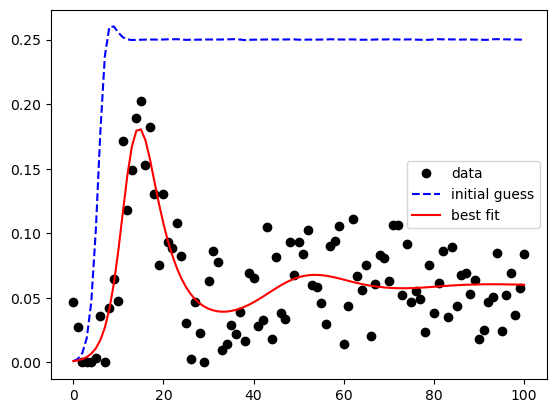

In [31]:
y0 = [1-1e-3, 1e-3, 0.]
fitted_output = integrate_SIRS(popt['x'])

initial_output = integrate_SIRS(p_initial)

plt.plot(times, daily_infection_data, 'ko', label='data')
plt.plot(times, initial_output.y[1], 'b--', label='initial guess')
plt.plot(times, fitted_output.y[1], 'r-', label='best fit')
plt.legend();
print(f'Generating parameters: {(beta, gamma, rho)}')
print(f'Inferred parameters: {popt["x"][0], popt["x"][1], popt["x"][2]}')

## SciPy recap

* Consistent and convenient interfaces to wide variety of different tools and algorithms
* Uses NumPy arrays as a common substrate for storing and manipulating data

| Subpackage | Description |
|:-----------|:------------|
|cluster     |Clustering algorithms|
|constants |Physical and mathematical constants|
|fftpack|Fast Fourier Transform routines|
|**integrate**|**Integration and ordinary differential equation solvers**|
|interpolate|Interpolation and smoothing splines|
|io|Input and Output|
|linalg|Linear algebra|
|ndimage|N-dimensional image processing|
|odr|Orthogonal distance regression|
|**optimize**|**Optimization and root-finding routines**|
|signal|Signal processing|
|sparse|Sparse matrices and associated routines|
|spatial|Spatial data structures and algorithms|
|special|Special functions|
|stats|Statistical distributions and functions|

# Pandas 

* DataFrames and Series for dealing with tabular data (e.g., spreadsheets)
    * uses NumPy underneath for much of the data processing
* Support for:
    * reading from csv/excel files and SQL databases (and dealing with missing data)
    * adding new columns derived from existing columns
    * groupby functions that perform aggegrate computations over subsets of data
    * concatenations, joins, and merges of multiple DataFrames
    

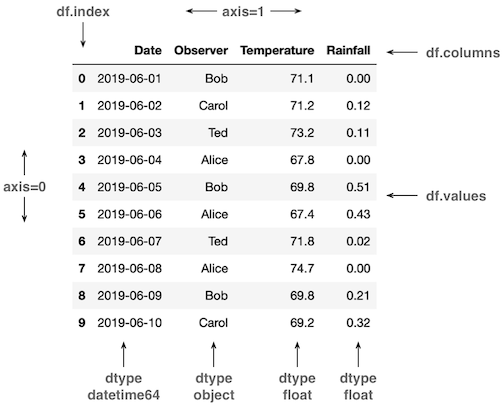

<!-- <img src="AnatomyDataFrame.png" width="750"/> -->


## Use pandas to read some baseball statistics into a DataFrame

In [32]:
import pandas as pd    # the conventional shorthand for importing pandas

# batting records from the Baseball Databank https://github.com/chadwickbureau/baseballdatabank
batting = pd.read_csv('https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv') 

batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112179,zimmebr01,2022,1,TOR,AL,77,76,11,8,4,...,3.0,2.0,1.0,5,33.0,0.0,5.0,1.0,0.0,0.0
112180,zimmebr01,2022,2,PHI,NL,9,16,4,4,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
112181,zimmebr01,2022,3,TOR,AL,23,13,3,1,0,...,2.0,1.0,1.0,0,8.0,0.0,1.0,0.0,0.0,0.0
112182,zimmebr02,2022,1,BAL,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112184 entries, 0 to 112183
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  112184 non-null  object 
 1   yearID    112184 non-null  int64  
 2   stint     112184 non-null  int64  
 3   teamID    112184 non-null  object 
 4   lgID      111447 non-null  object 
 5   G         112184 non-null  int64  
 6   AB        112184 non-null  int64  
 7   R         112184 non-null  int64  
 8   H         112184 non-null  int64  
 9   2B        112184 non-null  int64  
 10  3B        112184 non-null  int64  
 11  HR        112184 non-null  int64  
 12  RBI       111428 non-null  float64
 13  SB        109816 non-null  float64
 14  CS        88642 non-null   float64
 15  BB        112184 non-null  int64  
 16  SO        110084 non-null  float64
 17  IBB       75533 non-null   float64
 18  HBP       109368 non-null  float64
 19  SH        106116 non-null  float64
 20  SF  

## Adding derived data

Note the extension of list-style indexing to allow indexing based on column names

In [34]:
batting['1B'] = batting['H'] - batting['2B'] - batting['3B'] - batting['HR']

batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,26
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,31
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,30
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112179,zimmebr01,2022,1,TOR,AL,77,76,11,8,4,...,2.0,1.0,5,33.0,0.0,5.0,1.0,0.0,0.0,2
112180,zimmebr01,2022,2,PHI,NL,9,16,4,4,1,...,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,3
112181,zimmebr01,2022,3,TOR,AL,23,13,3,1,0,...,1.0,1.0,0,8.0,0.0,1.0,0.0,0.0,0.0,1
112182,zimmebr02,2022,1,BAL,AL,15,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Aggregating data

In [35]:
batting.sum(axis=0, numeric_only=True)   # the total number of each type of event over the history of MLB baseball

yearID    220874930.0
stint        121202.0
G           5662540.0
AB         15473330.0
R           2053628.0
H           4037839.0
2B           690515.0
3B           136982.0
HR           321224.0
RBI         1854797.0
SB           315319.0
CS           101889.0
BB          1427814.0
SO          2276463.0
IBB           77301.0
HBP          116273.0
SH           226843.0
SF            76717.0
GIDP         247892.0
1B          2889118.0
dtype: float64

## Filtering data

In [36]:
batting[batting.HR >= 60]    # all seasons in which a player hit at least 60 home runs (HR)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
22271,ruthba01,1927,1,NYA,AL,151,540,158,192,29,...,7.0,6.0,137,89.0,NaN,0.0,14.0,NaN,NaN,95
41676,marisro01,1961,1,NYA,AL,161,590,132,159,16,...,0.0,0.0,94,67.0,0.0,7.0,0.0,7.0,16.0,78
77405,mcgwima01,1998,1,SLN,NL,155,509,130,152,21,...,1.0,0.0,162,155.0,28.0,6.0,0.0,4.0,8.0,61
77752,sosasa01,1998,1,CHN,NL,159,643,134,198,20,...,18.0,9.0,73,171.0,14.0,1.0,0.0,5.0,20.0,112
78721,mcgwima01,1999,1,SLN,NL,153,521,118,145,21,...,0.0,0.0,133,141.0,21.0,2.0,0.0,5.0,12.0,58
79069,sosasa01,1999,1,CHN,NL,162,625,114,180,24,...,7.0,8.0,78,171.0,8.0,3.0,0.0,6.0,17.0,91
80768,bondsba01,2001,1,SFN,NL,153,476,129,156,32,...,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0,49
81786,sosasa01,2001,1,CHN,NL,160,577,146,189,34,...,0.0,2.0,116,153.0,37.0,6.0,0.0,12.0,6.0,86
111262,judgeaa01,2022,1,NYA,AL,157,570,133,177,28,...,16.0,3.0,111,175.0,19.0,6.0,0.0,5.0,14.0,87


## Groupby operations

An extremely powerful set of capabilities is provided by the <code>groupby</code> method on dataframes, which provides support for <i>split-apply-combine</i> operations.  This means, for example, that we can:
<ul>
    <li><i>split</i> a dataframe into groups based on identity of a specified key or some other criterion
            <li><i>apply</i> an aggregating function across each of the subgroups, and then <li> <i>combine</i> the aggregated information back in a single dataframe  
    </ul>

In [37]:
batting_by_year = batting.groupby('yearID').sum(numeric_only=True).reset_index()   # total number of each event for each year
batting_by_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,2381
1,1872,172,3306,15665,3390,4467,581,145,37,2132.0,269.0,134.0,263,265.0,0.0,0.0,0.0,0.0,97.0,3704
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,4098
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,4356
4,1875,247,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,5660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2018,1705,71590,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,15686,41207.0,929.0,1922.0,823.0,1235.0,3457.0,26322
148,2019,1742,71684,166651,23467,42039,8531,785,6776,22471.0,2280.0,832.0,15895,42823.0,753.0,1984.0,776.0,1150.0,3463.0,25947
149,2020,1433,26721,59030,8344,14439,2823,241,2304,7978.0,885.0,292.0,6092,15586.0,202.0,821.0,126.0,402.0,1237.0,9071
150,2021,1925,71621,161941,22010,39484,7863,671,5944,20993.0,2213.0,711.0,15794,42145.0,703.0,2112.0,766.0,1143.0,3328.0,25006


In [38]:
player_batting = batting.groupby('playerID').sum(numeric_only=True).reset_index()  # lifetime batting statistics for each player
player_batting

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,aardsda01,18084,9,331,4,0,0,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0
1,aaronha01,45195,23,3298,12364,2174,3771,624,98,755,...,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,2294
2,aaronto01,13768,7,437,944,102,216,42,6,13,...,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0,155
3,aasedo01,25786,13,448,5,0,0,0,0,0,...,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0
4,abadan01,6010,3,15,21,1,2,0,0,0,...,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20464,zupofr01,5876,3,16,18,3,3,1,0,0,...,0.0,0.0,2,6.0,0.0,0.0,0.0,0.0,0.0,2
20465,zuvelpa01,17875,9,209,491,41,109,17,2,2,...,2.0,0.0,34,50.0,1.0,2.0,18.0,0.0,8.0,88
20466,zuverge01,19551,12,266,142,5,21,2,1,0,...,0.0,1.0,9,39.0,0.0,0.0,16.0,0.0,3.0,18
20467,zwilldu01,7655,4,366,1280,167,364,76,15,30,...,46.0,0.0,128,155.0,0.0,4.0,31.0,0.0,0.0,243


## Plotting with pandas (uses matplotlib underneath)

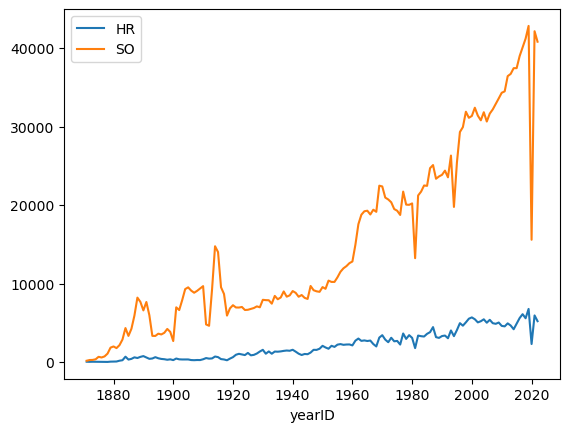

In [39]:
batting_by_year.plot(x='yearID', y=['HR', 'SO']);

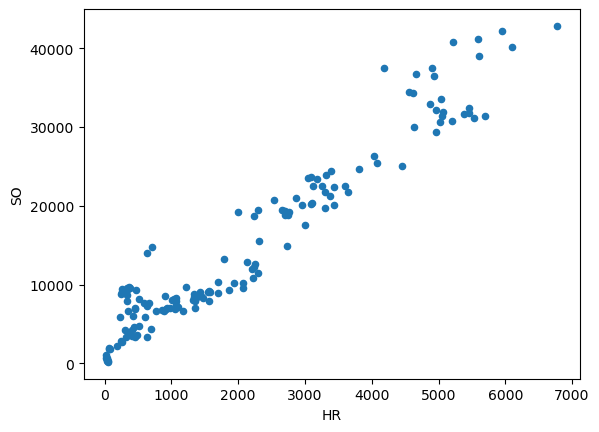

In [40]:
batting_by_year.plot.scatter(x='HR', y='SO');

In [41]:
batting_by_year.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
yearID,1.000000,0.936171,0.939097,0.895566,0.842112,0.887361,0.898263,-0.053828,0.935644,0.896186,0.225968,0.749618,0.915037,0.921324,0.816684,0.726617,0.152004,0.882222,0.935553,0.849683
stint,0.936171,1.000000,0.965335,0.938170,0.914813,0.924285,0.941565,0.076706,0.946750,0.922471,0.372397,0.705069,0.918141,0.968982,0.765880,0.872396,0.127741,0.869703,0.868693,0.884686
G,0.939097,0.965335,1.000000,0.986593,0.950310,0.978738,0.973064,0.142940,0.951540,0.966159,0.430729,0.795282,0.969647,0.969140,0.846190,0.844283,0.207461,0.915619,0.908317,0.955442
AB,0.895566,0.938170,0.986593,1.000000,0.968777,0.994280,0.968921,0.283466,0.907608,0.966083,0.501868,0.782844,0.975332,0.933480,0.810732,0.843130,0.265222,0.869423,0.860836,0.986660
R,0.842112,0.914813,0.950310,0.968777,1.000000,0.979565,0.973205,0.323620,0.910166,0.981743,0.535722,0.725041,0.955531,0.898770,0.753835,0.865958,0.164046,0.836009,0.815881,0.959821
H,0.887361,0.924285,0.978738,0.994280,0.979565,1.000000,0.980009,0.310624,0.904914,0.979677,0.501127,0.791783,0.976796,0.914093,0.795674,0.836020,0.288164,0.858101,0.847781,0.991462
2B,0.898263,0.941565,0.973064,0.968921,0.973205,0.980009,1.000000,0.210286,0.937820,0.981726,0.425524,0.752889,0.951778,0.932573,0.763255,0.852083,0.208909,0.856271,0.854143,0.949120
3B,-0.053828,0.076706,0.142940,0.283466,0.323620,0.310624,0.210286,1.000000,-0.057726,0.235272,0.599448,0.134938,0.244847,0.008111,-0.096017,0.244874,0.561863,-0.102318,-0.173475,0.389299
HR,0.935644,0.946750,0.951540,0.907608,0.910166,0.904914,0.937820,-0.057726,1.000000,0.939626,0.283713,0.711112,0.911953,0.963360,0.824819,0.821785,0.003655,0.915789,0.929160,0.847455
RBI,0.896186,0.922471,0.966159,0.966083,0.981743,0.979677,0.981726,0.235272,0.939626,1.000000,0.490975,0.757028,0.974670,0.922018,0.780110,0.856712,0.197621,0.861729,0.860579,0.953222


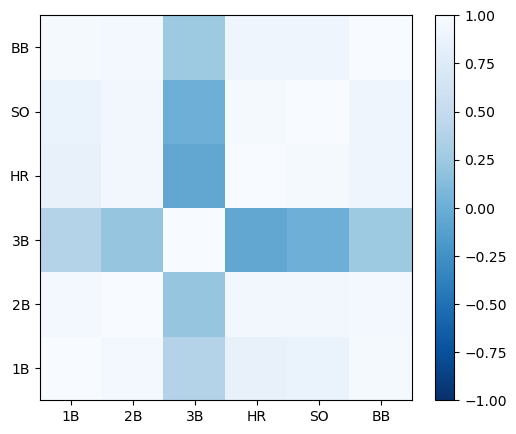

In [42]:
fig, ax = plt.subplots(figsize=(6,5))

stats = ['1B', '2B', '3B', 'HR', 'SO', 'BB']
data = batting_by_year[stats].corr()

im = ax.pcolor(data, vmin=-1, vmax=1, cmap=plt.cm.Blues_r)
ax.set_xticks(np.arange(len(stats))+0.5, stats);
ax.set_yticks(np.arange(len(stats))+0.5, stats);
fig.colorbar(im, ax=ax);

## Statistical modeling with statsmodels

Do an Ordinary Least Squares (OLS) fit of SO to HR

In [43]:
import statsmodels.api as sm
X = batting_by_year['HR']
y = batting_by_year['SO']
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     SO   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1935.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.26e-87
Time:                        10:08:28   Log-Likelihood:                -1432.6
No. Observations:                 152   AIC:                             2869.
Df Residuals:                     150   BIC:                             2875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2216.4229    379.622      5.839      0.0

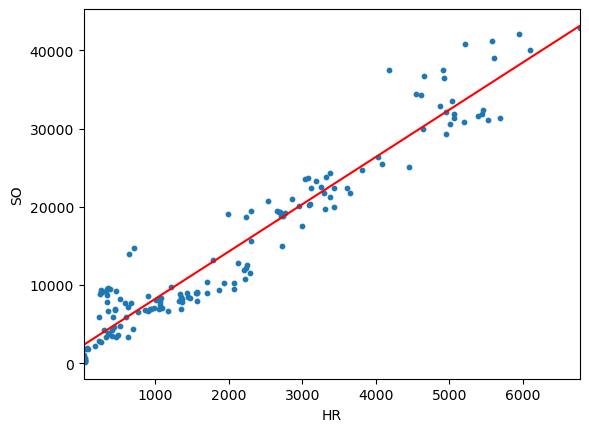

In [44]:
# Statsmodels provides a plotting API that also uses matplotlib
import matplotlib.pyplot as plt
fig = sm.graphics.abline_plot(model_results=results, c='r')
ax = fig.axes[0]
ax.scatter(X['HR'], y, s=10)
plt.xlabel('HR');
plt.ylabel('SO');

## Reading excel spreadsheets into Pandas

In [45]:
fires = pd.read_excel('https://github.com/CornellCAC/python-data-science-notebooks/raw/main/data/wildfires/Fires_100.xlsx', \
                      sheet_name='2016')
fires

,YEAR,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE
0,1878,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,59468.8800,<Null>,Suppression (Wildfire)
1,1895,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,628.1136,<Null>,Suppression (Wildfire)
2,1896,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,7531.7170,<Null>,Suppression (Wildfire)
3,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,1660.1030,<Null>,Suppression (Wildfire)
4,1898,California,Contract County,Los Angeles County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,428.4387,<Null>,Suppression (Wildfire)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11790,NaN,California,Contract County,Ventura County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,359.3586,<Null>,Suppression (Wildfire)
11791,NaN,California,Contract County,Ventura County,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,124.3117,<Null>,Suppression (Wildfire)
11792,NaN,California,USDA Forest Service,Shasta-Trinity National Forest,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,948.3046,<Null>,Suppression (Wildfire)
11793,NaN,California,USDA Forest Service,Mendocino National Forest,,0,<Null>,<Null>,14 - Unknown / Unidentified,NaN,<Null>,769.4049,<Null>,Suppression (Wildfire)


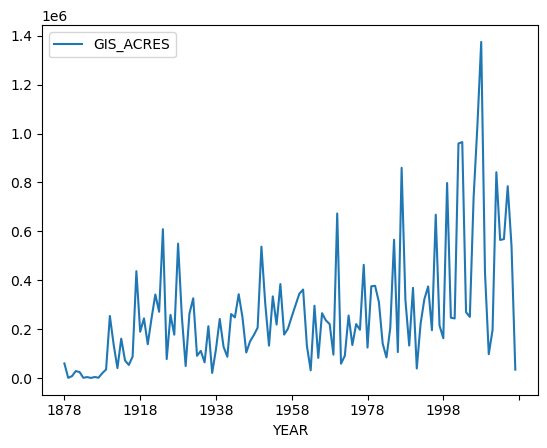

In [46]:
fires.groupby('YEAR').sum(numeric_only=True).reset_index().plot(x='YEAR', y='GIS_ACRES');

## Python in Excel

* Instead of bringing Excel data into Python, you can bring Python programming into Excel...
* Recently announced by Microsoft: available to all Enterprise, Business, Education, and Family and Personal users running Beta Channel on Windows (only on Windows for now)
* Allows for execution of Python code within cells in Excel spreadsheets and workbooks
* Excel runs locally, but Python code gets pushed off to Microsoft Azure cloud resources that have Anaconda Python Distribution installed, with results pulled back into the spreadsheet
* Some details at https://techcommunity.microsoft.com/t5/excel-blog/announcing-python-in-excel-combining-the-power-of-python-and-the/ba-p/3893439

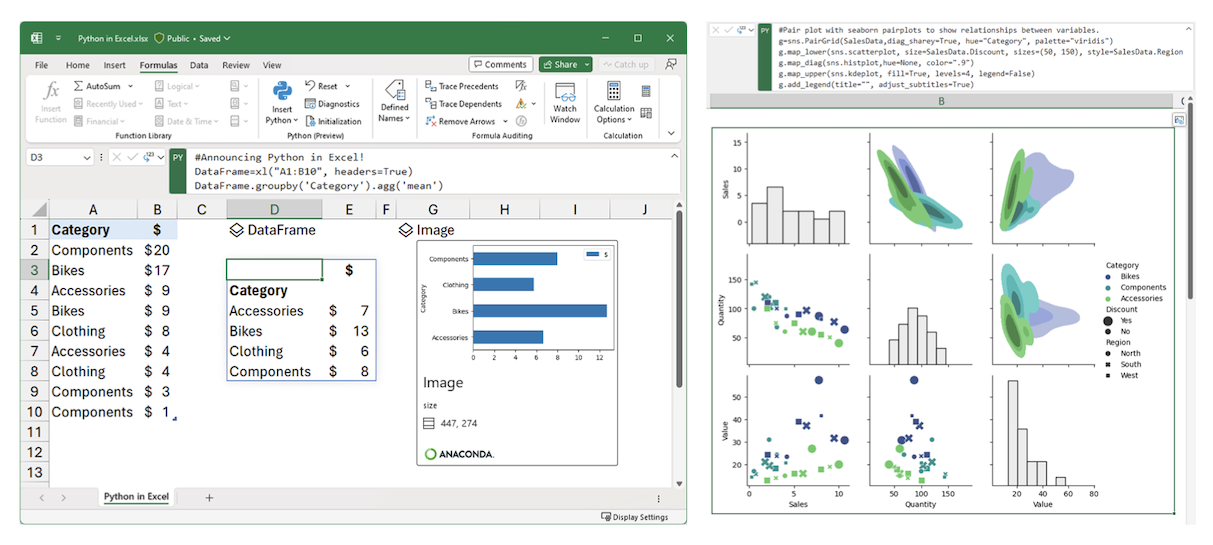

# Integration of the larger ecosystem


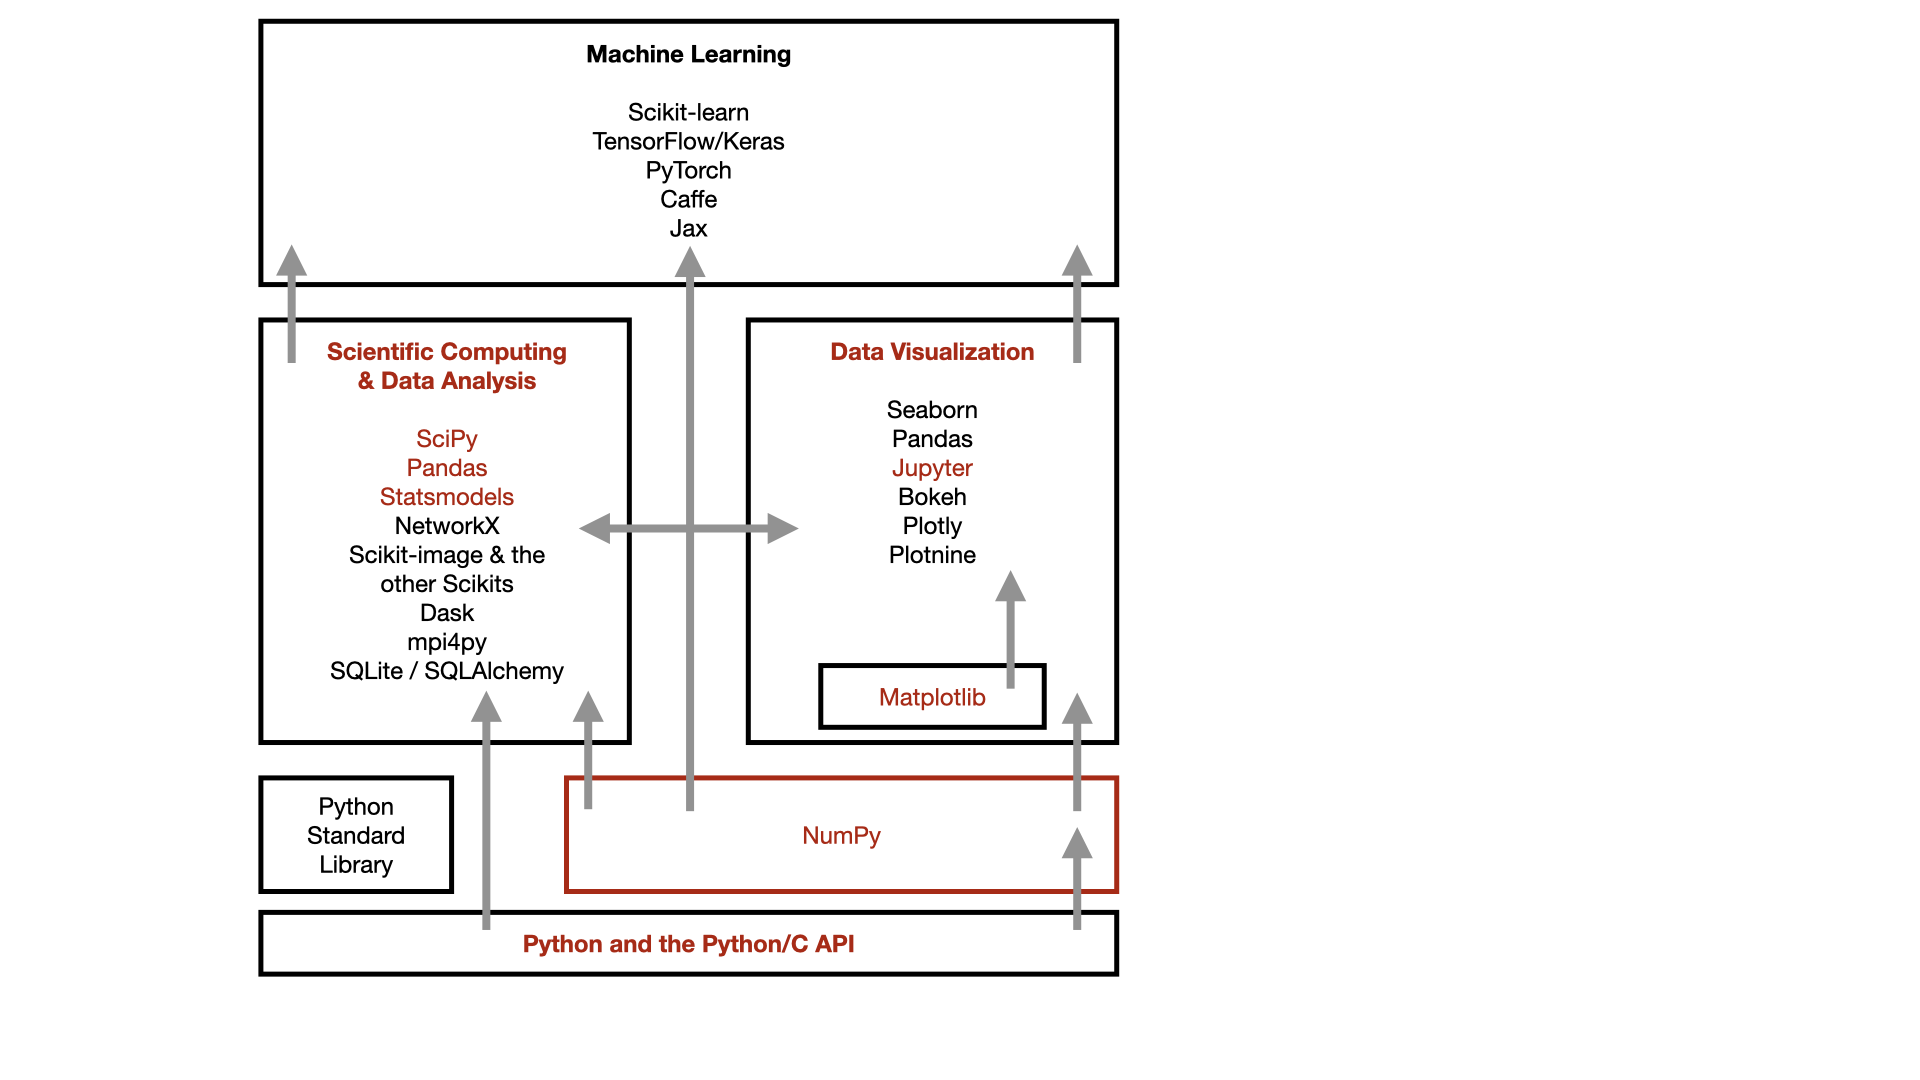
<!--<img align="left" src="PySciEcosystem.004.png" alt="Python ecosystem" height="800"/>-->

# Summary

* Overview of the Python ecosystem for scientific computing and data science
* A few core packages
    * NumPy
    * SciPy
    * Pandas
    * Matplotlib
* Integration of the larger ecosystem
* Exercises to follow below

# Thank you for attending!

* Please complete the survey
* Links to the recording and slides/notebook will be emailed to registrants, usually within a week
* Additional topics: https://its.weill.cornell.edu/scientific-computing-training-series

# Any questions?

# Exercises

* Scientific computing exercises (hopefully we can work through at least a couple of them, but feel free to jump ahead or work on them afterwards)
* Some basic Python programming exercises if you're just getting started
* Solutions to all the exercises at the end

## Scientific computing exercises

### Exercise: Estimating $\pi$ via Monte Carlo

An oft-taught computing example explores the use of Monte Carlo simulation to estimate the numerical value of $\pi$, by leveraging the role that $\pi$ plays in describing the geometry of a circle.  (The numerical value is $\pi \approx 3.14159...$, and is stored in the variable ```np.pi```.)

A circle of radius $r$ has area $A_c = \pi r^2$, and the smallest square that encloses that circle has sides of length $2r$ and hence has area $A_s = 4 r^2$.  Therefore:

$A_c/A_s = (\pi r^2) / (4 r^2) = \pi / 4$ <br/>
$\pi = 4 (A_c/A_s)$

Note that this result is independent of the radius of the circle, since $r$ cancels out.  For concreteness below, we will assume $r=1$.

We can estimate the value of $\pi$ by generating lots of uniformly random points in a square, and counting how many fall within the inscribed circle.  Since the points are uniformly random, the fraction of points that fall within the inscribed circle is approximately equal to the ratio of the two areas (and will converge to the exact value as the number of random points tends to infinity).  This situation is depicted in the figure below, with the red points being those within the unit circle and the blue points being those outside.

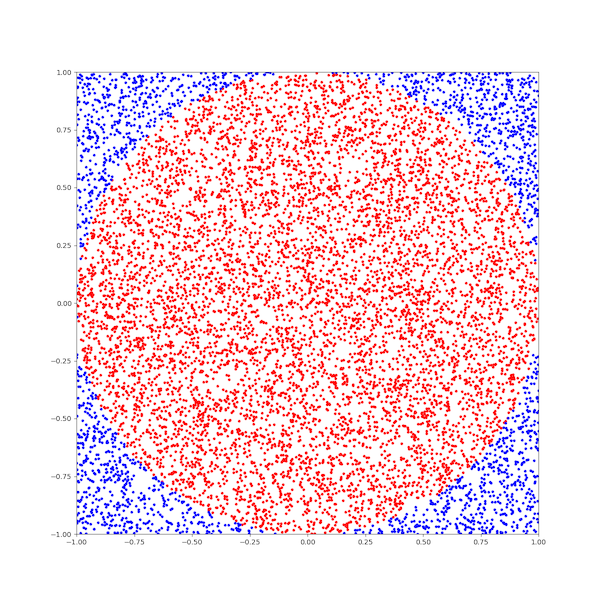

We will generate N random points in the unit square, and store them in an Nx2 numpy array (array with shape (N,2)), where the first column represents the $x$ coordinate of each of the points, and the second column represents the $y$ coordinates.

**Write three functions below.** The headers for each of the three functions have been provided below, along with a do-nothing function body consisting of ```...```.  Replace ```...``` by suitable code to implement each function. 

The first function named ```get_random_points_in_square``` should accept as input an integer N, and then generate N random points in the square bounded by [-1,-1] and [1,1], by creating a random array with shape (N,2).  (Hint: np.random.random() generates uniform random floats on the interval ```[0,1)```, so you will need to multiply and shift accordingly to generate random numbers on the interval ```[-1, 1)```.)

The second function named ```in_unit_circle``` should accept an Nx2 array of point coordinates and return a length N array of bools (True or False), indicating whether the distance from the origin (0,0) to the point (x,y) is less than or equal to 1.  (This computation can be done in one line for all the input points, by using array operations).

The third function named ```estimate_pi``` should accept an integer N as input, and return an estimate of $\pi$ through a series of three steps:
* Call your random point generator function to generate an Nx2 array of uniform random points, and store the result in a variable.
* Call ```in_unit_circle``` on your random points and sum up the number of points that lie within the unit circle (hint: even though ```in_unit_circle``` will return an array of bools, when that array is summed, each True value will be converted to the int 1 and each False value will be converted to 0).
* Divide the number of points inside the circle by the total number of points N, and multiply by 4 to return an estimate of $\pi$.

In [47]:
def get_random_points_in_square(N):
    pass

def in_unit_circle(p):
    pass

def estimate_pi(N):
    pass

Once you've written the two functions and executed the code cell, call the function ```estimate_pi(N)``` for different values of N, and run it repeatedly for the same value of N.  (Since the underlying computation is stochastic, you will get different estimates each time you run it.)  For larger N, you should see estimates that are closer to the real value, with smaller variance between runs.  If you're interested, you could write some code to do multiple estimation runs for multiple values of N to see how the estimates converge toward the true value as N increases.

*Warning*: if you provide a very large values of N, the computation will both take a long time and -- perhaps more importantly -- use up a lot of memory in generating the random numbers, since a very large array of numbers will be created.  Because the random numbers are independent of each other, you don't actually need to generate all of them at the same time in order to get good statistics, but you also don't want to generate them one at a time, since that will lose the benefit of vectorized array operations.  Better still is to generate blocks of intermediate size arrays, and to do so repeatedly to build up good statistics.  Such as approach is described in our CVW at: https://cvw.cac.cornell.edu/python-performance/exercise/exercise .

In [48]:
estimate_pi(10000000)

*Optional*

* If you are interested, figure out how to make a plot of red and blue points such as that shown above.  
* You could try comparing the run time required to estimate $\pi$ with N points all at once, as opposed to the situation where you would choose one random point at a time and build up statistics for N points total.

### Exercise: Parameter estimation for "The Pythagorean Theorem of Baseball"

In order to win a baseball game, a team needs to score more runs than its opponent.  Over the course of many games, however, the relationship between runs scored, runs allowed, and games won gets murkier, since a team might win games by slight margins but lose games by big margins.

The famous baseball statistician Bill James asked:

What fraction of games does a team win based on how many total runs it scores (R) and how many total runs it allows the opponent to score (RA)?  

And as originally formulated, James postulated this relationship:

$W/G = \frac{R^2}{R^2 + RA^2} = \frac{1}{1 + (RA/R)^2}$

This has been called "The Pythagorean Theorem of Baseball" due to the similarity of parts of the expression, in particular the sums of squares, with the Pythagorean Theorem of right triangles.

Others have argued that the data are better explained by an exponent that is different than 2:

$W/G = \frac{R^p}{R^p + RA^p} = \frac{1}{1 + (RA/R)^p}$

Let's try to estimate the exponent p by fitting the model to the data.  (If you want to read about this problem in more detail, please consult our CVW material at https://cvw.cac.cornell.edu/python-data-science/modeling-statistics/data-model-integration )

**Step 1: Process team records and create derived data**

First, execute the code cell below to read the Teams data from the Baseball DataBank, and then filter and augment the data to add two new columns to the DataFrame, for the win ratio 'W/G' and the runs ratio 'RA/R'.  The code also makes a scatter plot of the data in those columns, since it is their relationship that we are interested in.  You should observe a negative relationship between these quantities, which makes sense: as a team gives up many more runs than it scores (RA/R increasing), the fraction of games it wins decreases.

(Note: the Teams data is filtered to exclude games played before 1900, since the rules of the game were very different in those early years.  The filtered DataFrame that we are now working with is called ```teams00```.)

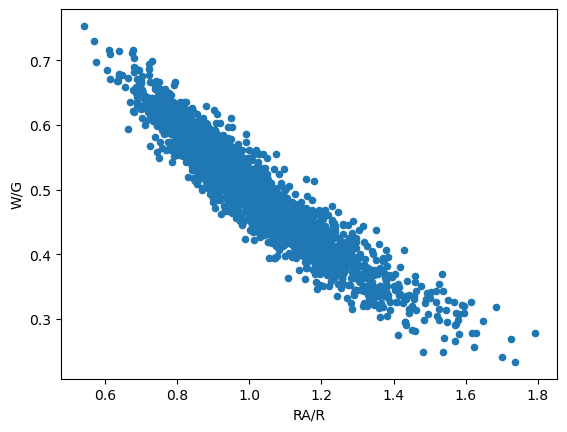

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

teams = pd.read_csv('https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv') 

teams00 = teams[teams.yearID >= 1900].copy()
teams00['W/G'] = teams00.W/teams00.G
teams00['RA/R'] = teams00.RA / teams00.R
teams00.plot.scatter('RA/R', 'W/G')
plt.xlabel('RA/R');
plt.ylabel('W/G');

**Step 2: Import curve_fit and inspect its documentation**

Execute the code cell below to import the curve_fit function from scipy.optimize and then inspect its documentation within the browser. 

You should note from the documentation that curve_fit uses non-linear least squares to fit a function, f, to data, and requires as input a function f, along with the xdata and ydata that are being fit:

```
curve_fit(f, xdata, ydata, (plus several other optional parameters))
```

The documentation produced from ```curve_fit?``` is rather long, so once you've read it, you can comment out that line and rerun the cell to make the documentation disappear.

In [50]:
from scipy.optimize import curve_fit
#curve_fit?

**Step 3: Define function to implement the Pythagorean model for an arbitrary value of the exponent**

Recall that we are trying to estimate the relationship between RA/R (xdata) and W/G (ydata), by finding the value of the exponent p that minimizes the least-squares error between the model and the data (as determined by curve_fit).  The "model" in this case the right-hand side of the expression provided above:

$W/G = \frac{1}{1 + (RA/R)^p}$

In order to use curve_fit, you'll need to define a function that implements the modified Pythagorean model.  In the code cell below, I've started defining a function named ```pythag(x, p)``` that takes multiple values of x data, and a parameter p.  Modify the code below by replacing the ```...``` with code to implement the model.


In [51]:
def pythag(x, p):
    ...

Next, call curve_fit, passing in as arguments the function you have written, along with the xdata and ydata.  Based on the documentation, the function should return a pair of objects, popt and pcov.  The first is an array of optimal parameter values, and the second is the covariance of those parameter values.  Since we have only one parameter p, the return popt should be an array of length 1.  Print out the optimal p that best fits the data.

Finally, plot the data along with both the best fit and the "Pythonagorean" fit with p=2.  Uncomment and fill in the missing bits of code below (...) in order to make the plot, and then run the code cell.

<Axes: xlabel='RA/R', ylabel='W/G'>

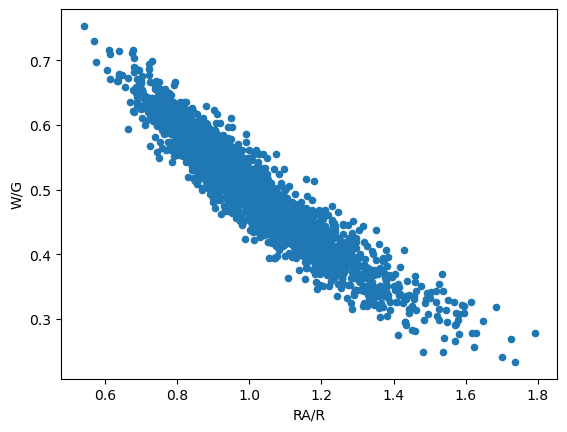

In [52]:
import numpy as np

xs = np.linspace(teams00['RA/R'].min(), teams00['RA/R'].max(), 100)
#expected_wins_for_p_equals_2 = ...
#expected_wins_for_p_equals_popt = ...

teams00.plot.scatter('RA/R', 'W/G')
#plt.plot(xs, expected_wins_for_p_equals_2, color='k', linewidth=2, label='2')
#plt.plot(xs, expected_wins_for_p_equals_popt, color='r', linewidth=2, label=str(popt[0]))
#plt.legend();

### Exercise: Steady-state solutions and root finding

Although there are initially transient dynamics for the SIRS infection model, the model eventually settles into a steady state where the state variables remain unchanged.  The system is in steady state when $\frac{dS}{dt} = \frac{dI}{dt} = \frac{dR}{dt} = 0.$

We can try to solve for a steady-state solution without actually integrating the ODE forward in time, by using a root-finding method.

The process of root-finding is computationally abstracted to require a function of one or more variables $\vec y$ that we want to find a root of, i.e., find root $\vec y^*$ such that 

$$\vec F(\vec y^*) = \vec 0$$

For the SIRS model, we want to find the values y = [S,I,R] for which the time rate of change of each state variable is 0.

Step 1: For use with the function ```scipy.optimize.root```, write a function F(y,p) that will evaluate the right-hand side of the SIRS equations for the state variables y and the parameters p.  (Hint, this will look very similar to the function SIRS that we used above, but without the time parameter t.)

Step 2: Once the function F is written, call ```scipy.optimize.root``` with an initial guess of y = [1/3, 1/3, 1/3].  You will need to pass the model parameters p = (beta, gamma, rho) to the root function, and you might also want to specify the options method='broyden1' and tol=1e-14.

Step 3: Copy and paste the SIRS dynamical code previously run in the notebook, and run the code to plot the S,I,R trajectories.  On the same figure, plot the steady-state values returned by scipy.optimize.root (a single point for each of the steady-state S,I,R values).  If you've done everything correctly, the steady-state values you've computed with root should agree with the asymptotic values of the dynamical trajectories.

### Exercise: Integrating the Lorenz equations

The Lorenz equations are a relatively simple dynamical model, originally developed as an approximation to convective rolls in the atmosphere, that exhibits intricate dynamics, including chaos in parts of parameter space.  The equations describe the dynamics of 3 state variables (x, y, z) and the dynamics is dictated by the values of 3 parameters (s, r, b).

\begin{align}
\frac{dx}{dt} &= s (y - x) \\
\frac{dy}{dt} &= x (r-z) - y \\
\frac{dz}{dt} &= x y - b z
\end{align}

By modifying the code presented above for integrating the dynamics of the SIRS infection model, write some new code to solve for the dynamics of the Lorenz equations.

Integrate the equations with the parameter values: s = 10, r = 28, b = 8/3.  After extracting the x, y, z variables from the 3-dimensional trajectory (and storing them in the variables `xs`, `ys`, `zs`, respectively), use the code below to make a 3-dimensional plot of the trajectory, after uncommenting the line ```ax.plot(xs, ys, zs, lw=0.5)```.  You should see the famous Lorenz attractor, which reveals the complex chaotic trajectory in this part of parameter space.

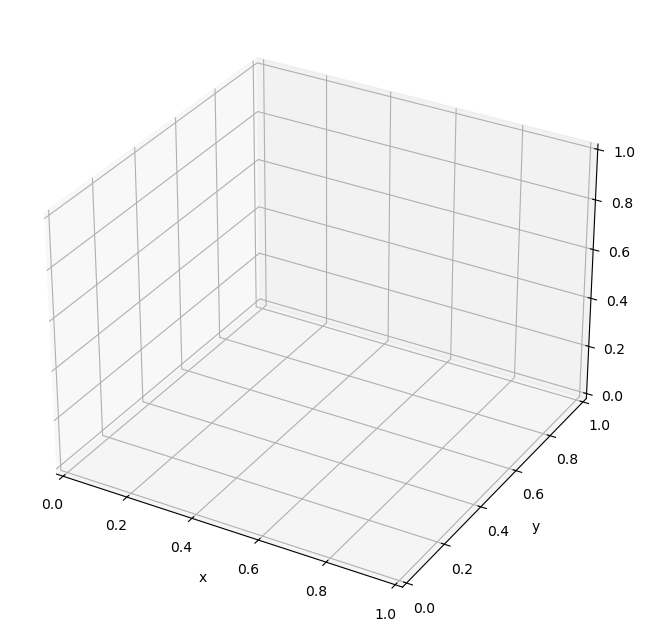

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline
ax = plt.figure(figsize=(10,8)).add_subplot(projection='3d')
#ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

Next, integrate the equations again, but using the parameter values s=4, r = 28, b = 8/3.  Replot the 3D trajectory.  You should see that, instead of a chaotic trajectory that never settles down, at this point in parameter space the system spirals in to a stable fixed point.

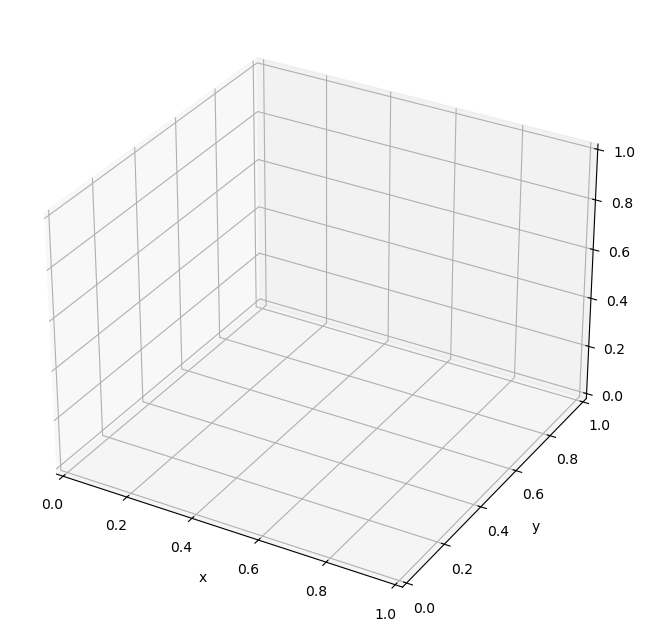

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline
ax = plt.figure(figsize=(10,8)).add_subplot(projection='3d')
#ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

### Exercise: Finite differences using numpy array operations

Finite differences are a technique to compute derivatives of a continuous field by discretizing that field on a grid and combining grid values to compute approximations to the derivatives.

The Laplacian $\nabla^2$ is a second derivative operator, and in two dimensions is the sum of partial second derivatives in the x and y coordinate directions:

$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$

Such an operator turns up in many applications, such as the partial differential equation (PDE) describing the diffusion of a two-dimensional field f(x,y,t):

$\frac{\partial f(x,y,t)}{\partial t} = D \nabla^2 f(x,y,t)$

To compute an approximate Laplacian of a field using finite differences, one can discretize the field on an array of grid points, and then access array values using a repeated computational stencil to compute $\nabla^2 f$ everywhere on the grid.  For an array A, and a spacing between grid points $\delta x$,

$\nabla^2 A_{i,j} \approx (A_{i,j+1} + A_{i,j-1} + A_{i+1,j} + A_{i-1,j} - 4 A_{i,j})/(\delta x)$

One might typically write code like this to compute the Laplacian of a 2D array A, with grid spacing dx, in which the values of the Laplacian are computed everywhere in the interior of the array (note: the boundaries of the array need to be treated differently):

<pre>
nx, ny = A.shape
for i in range(1,nx-1):
    for j in range(1,ny-1):
        laplacian_A[i,j] = (A[i+1,j] + A[i-1,j] + A[i,j+1] + A[i,j-1] - 4*A[i,j])/(dx*dx)
</pre>

This is depicted schematically in the left panel of the figure below, where we iterate over all the interior grid points and apply the (1,1,1,1,-4) stencil at each point.

Performance-wise, this again suffers from the fact that we are executing for loops in Python to access individual numpy array elements.  

Instead, we can use array operations to do the computation all at once (over all grid points) using shifted copies of the array A, as depicted in the right panel of this figure.  In the figure, the 4 colored squares are intended to indicate 4 separate arrays, which when overlaid with the unshifted array A, carry out the desired (1,1,1,1,-4) computation for the Laplacian. 

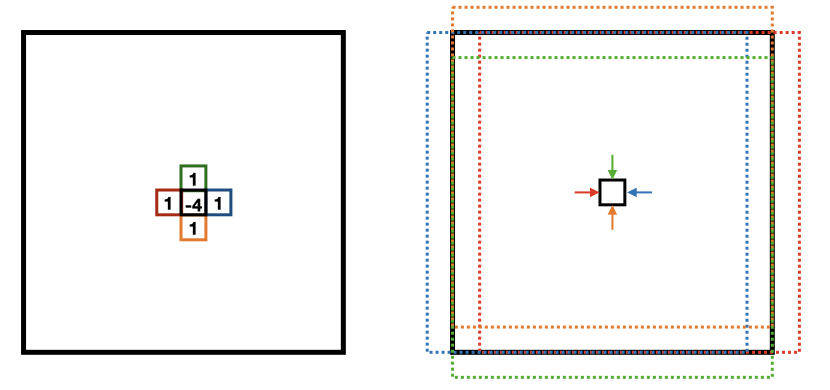

<!-- <img align="left" src="ShiftedArrays.001.png" alt="Python ecosystem" height="1000"/> -->

**Step 1: Define a function to compute the Laplacian**

Using array slicing, create subarrays for the interior (non-boundary) part of an array A, along with shifted copies of A, one shift for each of the 4 directions that will overlay neighboring grid points onto the unshifted array.  (Hint: A[1:-1,1:-1] will slice out the interior of the array A.)

In [55]:
def Laplacian(A, dx):
    ...

**Step 2: Create a random array of size 1000x1000 and test that your function gives the same result as the explicit looping version**

**Step3: Run %timeit for both the Laplacian function and the explicit looping version to estimate the speedup due to using numpy array operations instead of looping**

In [56]:
# Speedup?



## Basic Python exercises

### Data types and data structures

Use a **for** statement and the **range** function to loop over the integers from 0 through 9 and print out each integer and its square

Initialize an empty list, then loop over the integers from 0 through 9 and append the square of each integer to the list

Use list comprehension syntax for create a list containing the squares of each integer from 0 through 9

From the list you created in the previous exercise, slice out the last 4 elements and assign it to another variable

Create a dictionary to store phone numbers and assign it to a variable.  The phone number for 'Me' is '555-1212', and the phone number for 'You' is '555-1234'

Print out the phone number for 'Me'

What happens if you try to print out the phone number for 'SomeoneElse'?

### Functions

Write a function that takes two numbers, adds them together, raises their sum to the 6th power, and returns the result.

Call the function you just wrote with the inputs 2 and 4.

Write a function that takes a single input, and returns that input if its value is greater than or equal 0, and returns the negative of that input if its value is less than 0.

For the function you just wrote, what is the common mathematical name for the operation that it performs?

## Solutions to Exercises

In [57]:
w = np.random.random((6,6))

w[0, :] = 0.  
w[-1,:] = 0.
w[:, 0] = 0.
w[:,-1] = 0.

w

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.89976281, 0.61246459, 0.45443921, 0.33512793, 0.        ],
       [0.        , 0.82554705, 0.95650294, 0.11518529, 0.40884996, 0.        ],
       [0.        , 0.98182803, 0.62963426, 0.993164  , 0.08659442, 0.        ],
       [0.        , 0.76886643, 0.33254718, 0.55922953, 0.48422525, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])

### Solution: Estimating $\pi$ via Monte Carlo

In [93]:
def get_random_points_in_square(N):
    return 2*np.random.random((N,2))-1

def in_unit_circle(p):
    return np.sqrt(p[:,0]**2 + p[:,1]**2) <= 1.0

def estimate_pi(N):
    points = get_random_points_in_square(N)
    number_in_circle = np.sum(in_unit_circle(points))
    return 4 * number_in_circle / N

estimate_pi(10000000)

3.14224

### Solution: Parameter estimation for "The Pythagorean Theorem of Baseball"

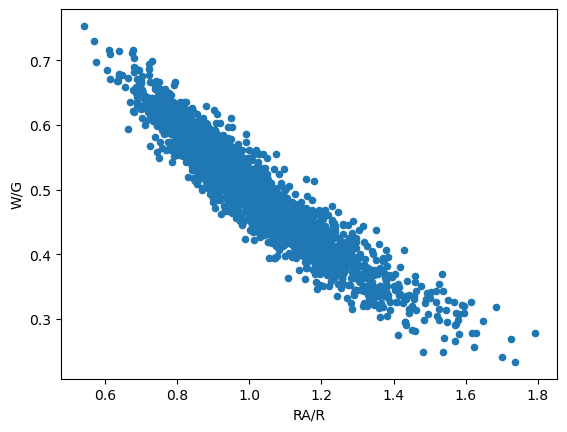

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

teams = pd.read_csv('https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv') 

teams00 = teams[teams.yearID >= 1900].copy()
teams00['W/G'] = teams00.W/teams00.G
teams00['RA/R'] = teams00.RA / teams00.R
teams00.plot.scatter('RA/R', 'W/G')
plt.xlabel('RA/R');
plt.ylabel('W/G');

In [60]:
from scipy.optimize import curve_fit

In [61]:
def pythag(x, p):
    return (1 / (1 + x**p))

In [62]:
popt, pcov = curve_fit(pythag, teams00['RA/R'], teams00['W/G'])
print(popt)

[1.83764933]


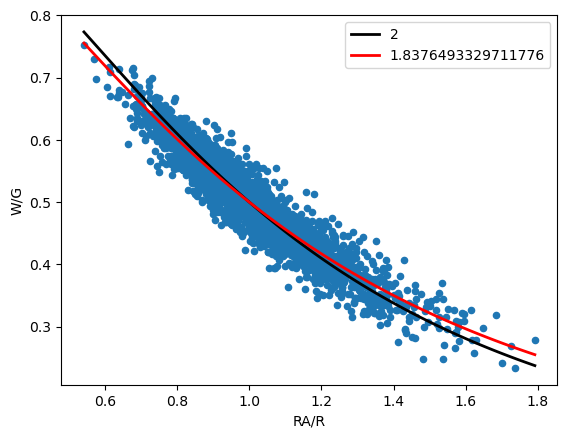

In [63]:
import numpy as np

xs = np.linspace(teams00['RA/R'].min(), teams00['RA/R'].max(), 100)
expected_wins_for_p_equals_2 = pythag(xs, p=2)
expected_wins_for_p_equals_popt = pythag(xs, p=popt[0])

teams00.plot.scatter('RA/R', 'W/G')
plt.plot(xs, expected_wins_for_p_equals_2, color='k', linewidth=2, label='2')
plt.plot(xs, expected_wins_for_p_equals_popt, color='r', linewidth=2, label=str(popt[0]))
plt.legend();

### Solution: Steady-state solutions using root finding

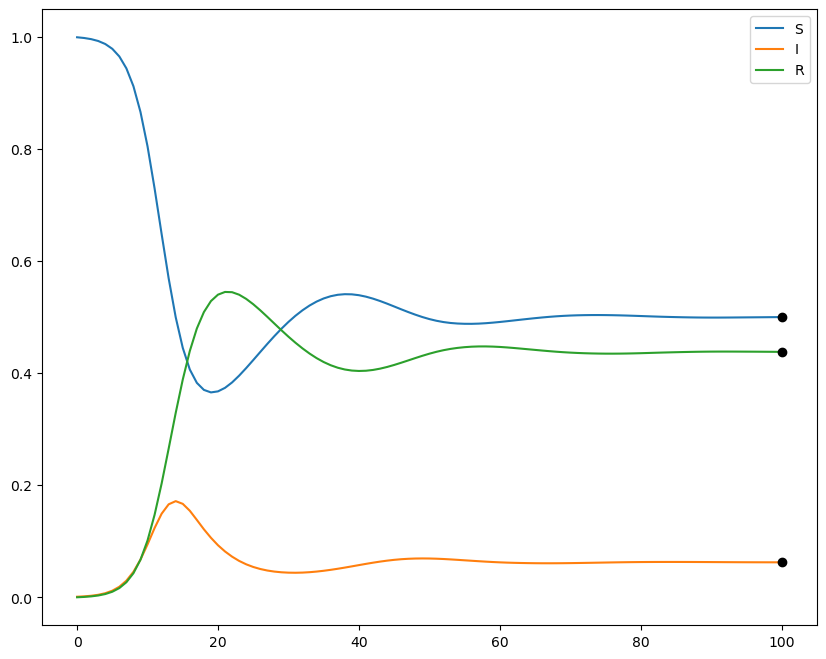

In [64]:
from scipy.optimize import root    # root(fn, y0) returns value of y such that fn(y)=0, starting from guess y0

def F(y, p):
    return SIRS(0., y, p)

p = (beta, gamma, rho)

steady_state = root(F, [1/3, 1/3, 1/3], args=(p,), method='broyden1', tol=1e-14)

Sss, Iss, Rss = steady_state['x']

fig = plt.figure(figsize=(10,8))

plt.plot(times, Ss, label='S')
plt.plot(times, Is, label='I')
plt.plot(times, Rs, label='R')
plt.plot(times[-1], [Sss], 'ko')
plt.plot(times[-1], [Iss], 'ko')
plt.plot(times[-1], [Rss], 'ko')
plt.legend();

### Solution: Integrating the Lorenz equations

In [65]:
import numpy as np
from scipy.integrate import solve_ivp

def lorenz(t, xyz, s, r, b):
    x,y,z = xyz
    xdot = s*(y-x)
    ydot = x*(r-z) - y
    zdot = x*y - b*z
    return [xdot, ydot, zdot]

def integrate_lorenz(ic=[1.,1.,1.], s=10, r=28, b=8/3):
    t_eval = np.linspace(0., 100., 10001)
    sol = solve_ivp(lorenz, (t_eval[0], t_eval[-1]), ic, args=(s, r, b), t_eval=t_eval, method='LSODA')
    return sol

In [66]:
sol = integrate_lorenz(ic=[1.,1.,1.], s=10)
xs, ys, zs = sol['y']

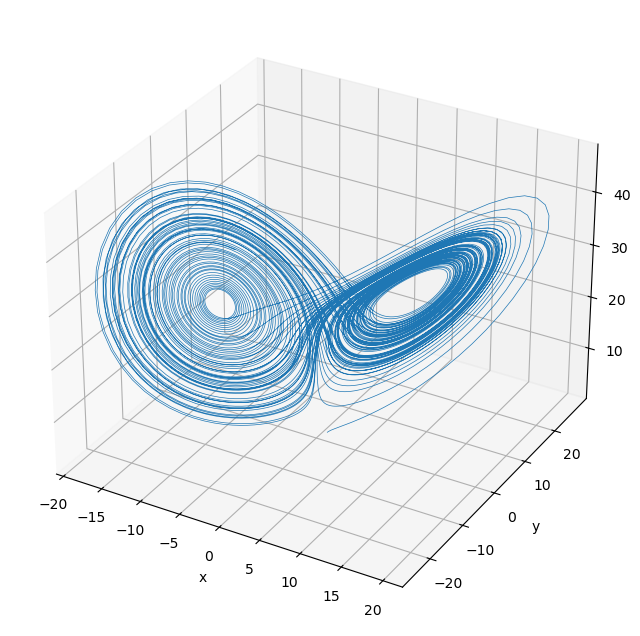

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline
ax = plt.figure(figsize=(10,8)).add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

Next, integrate the equations again, but using the parameter values s=4, r = 28, b = 8/3.  Replot the 3D trajectory.  You should see that, instead of a chaotic trajectory that never settles down, at this point in parameter space the system spirals in to a stable fixed point.

In [68]:
sol = integrate_lorenz(ic=[1.,1.,1.], s=4)
xs, ys, zs = sol['y']

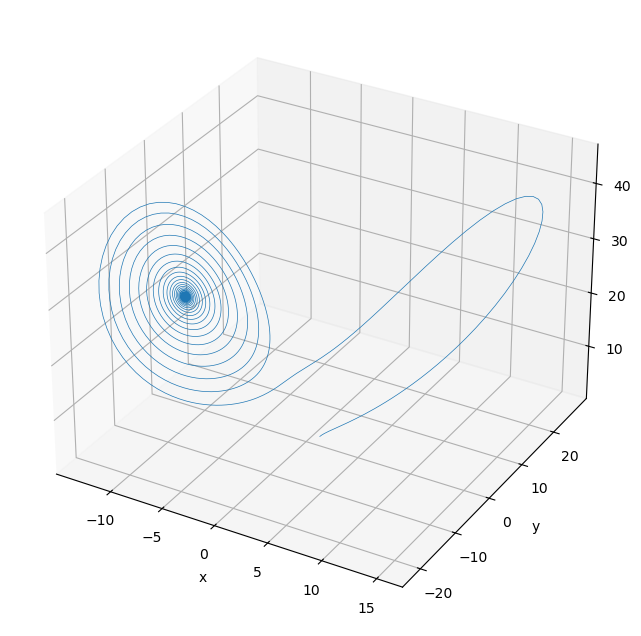

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline
ax = plt.figure(figsize=(10,8)).add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

### Solution: Finite differences using numpy array operations

In [70]:
def Laplacian(A, dx):
    nx, ny = A.shape
    laplacian_A = np.zeros((nx, ny), float)
    laplacian_A[1:-1, 1:-1] = (A[1:-1,2:] + A[1:-1,:-2] + \
                         A[2:,1:-1] + A[:-2,1:-1] - 4.*A[1:-1,1:-1])/(dx*dx)
    return laplacian_A

In [71]:
A = np.random.random((1000,1000))

In [72]:
# first compute the Laplacian with the function
d2A = Laplacian(A, 1.)

# next compute the Laplacian with nested for loops
nx, ny = A.shape
laplacian_A = np.zeros_like(A)
dx = 1.

for i in range(1,nx-1):
    for j in range(1,ny-1):
        laplacian_A[i,j] = (A[i+1,j] + A[i-1,j] + A[i,j+1] + A[i,j-1] - 4*A[i,j])/(dx*dx)

# now compare the two Laplacians element-wise
diff = d2A-laplacian_A
diff.sum(), diff.max(), diff.min(), np.linalg.norm(diff), np.allclose(d2A, laplacian_A)

(-4.440892098500626e-14,
 8.881784197001252e-16,
 -8.881784197001252e-16,
 1.9867570535754357e-13,
 True)

In [73]:
%%timeit

d2A = Laplacian(A, 1.)

4.35 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [74]:
%%timeit

nx, ny = A.shape
laplacian_A = np.zeros_like(A)
dx = 1.

for i in range(1,nx-1):
    for j in range(1,ny-1):
        laplacian_A[i,j] = (A[i+1,j] + A[i-1,j] + A[i,j+1] + A[i,j-1] - 4*A[i,j])/(dx*dx)


695 ms ± 8.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
# Speedup?


### Solutions: Basic Python exercises

Use a **for** statement and the **range** function to loop over the integers from 0 through 9 and print out each integer and its square

In [76]:
for i in range(10):
    print(i, i**2)

0 0
1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81


Initialize an empty list, then loop over the integers from 0 through 9 and append the square of each integer to the list

In [77]:
result = []
for i in range(10):
    result.append(i**2)
print(result)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Use list comprehension syntax for create a list containing the squares of each integer from 0 through 9

In [78]:
result = [i**2 for i in range(10)]
print(result)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


From the list you created in the previous exercise, slice out the last 4 elements and assign it to another variable

In [79]:
lastfour = result[-4:]
print(lastfour)

[36, 49, 64, 81]


Create a dictionary to store phone numbers and assign it to a variable.  The phone number for 'Me' is '555-1212', and the phone number for 'You' is '555-1234'

In [80]:
phone_numbers = {'Me': '555-1212', 'You': '555-1234'}

Print out the phone number for 'Me'

In [81]:
print(phone_numbers['Me'])

555-1212


What happens if you try to print out the phone number for 'SomeoneElse'?

In [82]:
#Uncomment the line below and then run the code cell

#print(phone_numbers['SomeoneElse'])

# You get a KeyError, because the key 'SomeoneElse' does not appear in the dictionary.

Write a function that takes two numbers, adds them together, raises their sum to the 6th power, and returns the result.

In [83]:
def f(x,y):
    return (x+y)**6

Call the function you just wrote with the inputs 2 and 4.

In [84]:
f(2,4)

46656

Write a function that takes a single input, and returns that input if its value is greater than or equal 0, and returns the negative of that input if its value is less than 0.

In [85]:
def g(x):
    if x >= 0:
        return x
    else:
        return -x

Call the function you just wrote, once with the input 3, and once with the input -3.

In [86]:
print(g(3))
print(g(-3))

3
3


For the function you just wrote, what is the common mathematical name for the operation that it performs?

In [90]:
"absolute value"

# which is implemented in Python by the builtin function abs

abs(-3)

3

In [89]:
print('The End.  Thanks for attending!')

The End.  Thanks for attending!
